### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)
import numpy as np

In [283]:
tf.__version__

'1.12.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [286]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [287]:
print('Training data shape : ', trainX.shape, trainY.shape)

print('Testing data shape : ', testX.shape, testY.shape)

('Training data shape : ', (60000, 28, 28), (60000,))
('Testing data shape : ', (10000, 28, 28), (10000,))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
import matplotlib.pyplot as plt

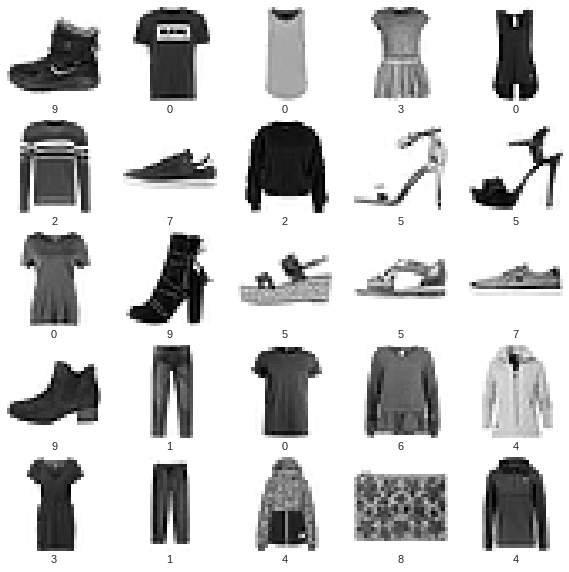

In [289]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(trainY[i])

In [290]:
trainY

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [291]:
trainX = trainX.reshape(-1, 28,28, 1)
testX = testX.reshape(-1, 28,28, 1)
trainX.shape, testX.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX = trainX / 255.
testX = testX / 255.

In [0]:
trainY_onehot = tf.keras.utils.to_categorical(trainY)
testY_onehot = tf.keras.utils.to_categorical(testY)

In [294]:
print(trainX.shape,testX.shape)
print(trainY.shape,testY.shape)

((60000, 28, 28, 1), (10000, 28, 28, 1))
((60000,), (10000,))


In [295]:
print(testY_onehot.shape)
print('First 5 examples now are: ', testY_onehot[0:5])

(10000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))


In [296]:
print(trainY_onehot.shape)
print('First 5 examples now are: ', trainY_onehot[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [0]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(trainX, trainY_onehot, test_size=0.3, random_state=13)

In [299]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((42000, 28, 28, 1), (18000, 28, 28, 1), (42000, 10), (18000, 10))

In [0]:
batch_size = 64
epochs = 20
num_classes = 10

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy')

### Execute the model using model.fit()

In [304]:
final_model = model.fit(train_X, train_label, 
                        epochs=10,verbose=1,batch_size =64,
          validation_data=(valid_X, valid_label))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 98s 2ms/step - loss: 1.2584 - val_loss: 0.8020
Epoch 2/10
42000/42000 [==============================] - 97s 2ms/step - loss: 0.6699 - val_loss: 0.6453
Epoch 3/10
42000/42000 [==============================] - 99s 2ms/step - loss: 0.5706 - val_loss: 0.8597
Epoch 4/10
42000/42000 [==============================] - 98s 2ms/step - loss: 0.5172 - val_loss: 0.5727
Epoch 5/10
42000/42000 [==============================] - 98s 2ms/step - loss: 0.4756 - val_loss: 0.6122
Epoch 6/10
42000/42000 [==============================] - 99s 2ms/step - loss: 0.4453 - val_loss: 0.5568
Epoch 7/10
42000/42000 [==============================] - 98s 2ms/step - loss: 0.4220 - val_loss: 0.4215
Epoch 8/10
42000/42000 [==============================] - 98s 2ms/step - loss: 0.4046 - val_loss: 0.4094
Epoch 9/10
42000/42000 [==============================] - 99s 2ms/step - loss: 0.3882 - val_loss: 0.4539
Epoch

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
model.add(BatchNormalization())

### Execute the model

In [306]:
model.fit(train_X, train_label, 
                        epochs=10,verbose=1,batch_size = 64,
          validation_data=(valid_X, valid_label))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 95s 2ms/step - loss: 7.6337 - val_loss: 7.5191
Epoch 2/10
42000/42000 [==============================] - 97s 2ms/step - loss: 7.3766 - val_loss: 7.2613
Epoch 3/10
42000/42000 [==============================] - 96s 2ms/step - loss: 6.7744 - val_loss: 6.4669
Epoch 4/10
42000/42000 [==============================] - 96s 2ms/step - loss: 6.4388 - val_loss: 6.4669
Epoch 5/10
42000/42000 [==============================] - 96s 2ms/step - loss: 6.4388 - val_loss: 6.4669
Epoch 6/10
42000/42000 [==============================] - 97s 2ms/step - loss: 6.4388 - val_loss: 6.4669
Epoch 7/10
42000/42000 [==============================] - 96s 2ms/step - loss: 6.4388 - val_loss: 6.4669
Epoch 8/10
42000/42000 [==============================] - 97s 2ms/step - loss: 6.4388 - val_loss: 6.4669
Epoch 9/10
42000/42000 [==============================] - 97s 2ms/step - loss: 6.4388 - val_loss: 6.4669
Epoch

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
model.compile(keras.optimizers.SGD(lr=0.001), loss='categorical_crossentropy')

In [308]:
model.fit(train_X, train_label, 
                        epochs=10,verbose=1,batch_size = 64,
          validation_data=(valid_X, valid_label))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 98s 2ms/step - loss: 6.4388 - val_loss: 6.4669
Epoch 2/10
42000/42000 [==============================] - 97s 2ms/step - loss: 6.4388 - val_loss: 6.4669
Epoch 3/10
42000/42000 [==============================] - 96s 2ms/step - loss: 6.4388 - val_loss: 6.4669
Epoch 4/10
42000/42000 [==============================] - 96s 2ms/step - loss: 6.4388 - val_loss: 6.4669
Epoch 5/10
42000/42000 [==============================] - 97s 2ms/step - loss: 6.4388 - val_loss: 6.4669
Epoch 6/10
42000/42000 [==============================] - 95s 2ms/step - loss: 6.4388 - val_loss: 6.4669
Epoch 7/10
42000/42000 [==============================] - 94s 2ms/step - loss: 6.4388 - val_loss: 6.4669
Epoch 8/10
42000/42000 [==============================] - 94s 2ms/step - loss: 6.4388 - val_loss: 6.4669
Epoch 9/10
42000/42000 [==============================] - 94s 2ms/step - loss: 6.4388 - val_loss: 6.4669
Epoch

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='sgd', loss=keras.losses.categorical_crossentropy)

## Review model

In [311]:
model.summary()

ValueError: ignored

### Run the model

In [312]:
model.fit(train_X, train_label, 
                        epochs=10,verbose=1,batch_size = 64,
          validation_data=(valid_X, valid_label))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10


InvalidArgumentError: ignored